   Timestamp  PM2.5 (µg/m³)  PM10 (µg/m³)  NH3 (µg/m³)  Benzene (µg/m³)  \
0 2023-05-01      19.369545     36.501932    27.693229         0.108750   
1 2023-05-02      20.539348     31.297283    26.885208         0.109271   
2 2023-05-03      20.206250     37.149091    25.037813         0.113958   
3 2023-05-04      18.622738     32.812143    26.226667         0.118750   
4 2023-05-05      31.897604     63.149167    25.659271         0.164062   

     AT (°C)     RH (%)   AQI  
0  26.177604  71.717292  53.0  
1  26.393750  71.775833  47.0  
2  26.516563  73.460938  52.0  
3  26.869167  72.293750  48.0  
4  29.086042  59.965313  52.0  


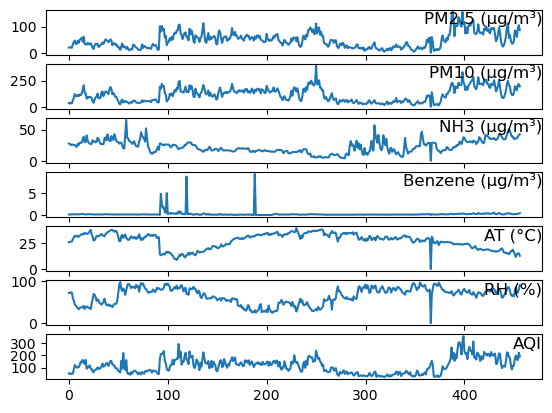

Training Data:
      Timestamp  PM2.5 (µg/m³)  PM10 (µg/m³)  NH3 (µg/m³)  Benzene (µg/m³)  \
17   2023-05-18      31.863587    128.004773    30.090104         0.120937   
66   2023-07-06      29.891875     59.040208    31.370208         0.122917   
410  2022-11-15      75.010000    194.090000    31.020000         0.320000   
320  2022-08-17       7.960000     26.920000    25.010000         0.070000   
31   2023-06-01      25.546250     83.844583    30.315833         0.117396   

       AT (°C)     RH (%)    AQI  
17   34.468854  37.756979  164.0  
66   31.167500  84.778542   72.0  
410  21.680000  67.790000  182.0  
320  31.480000  72.030000   29.0  
31   32.535312  48.021667   93.0  

Testing Data:
      Timestamp  PM2.5 (µg/m³)  PM10 (µg/m³)  NH3 (µg/m³)  Benzene (µg/m³)  \
304  2022-08-01      21.240000     62.050000    15.260000         0.080000   
39   2023-06-09      44.692083    132.307812    42.269583         0.149167   
341  2022-09-07      39.430000     78.430000    21.920000

/opt/anaconda3/envs/my_new_env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0461 - val_loss: 0.0206
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0224 - val_loss: 0.0148
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0156 - val_loss: 0.0141
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0155 - val_loss: 0.0135
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0149 - val_loss: 0.0140
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0134 - val_loss: 0.0127
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0172 - val_loss: 0.0148
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0153 - val_loss: 0.0120
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0137 - val_loss: 0.0118
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0154 - val_loss: 0.0129
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0135 - val_loss: 0.0123
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0

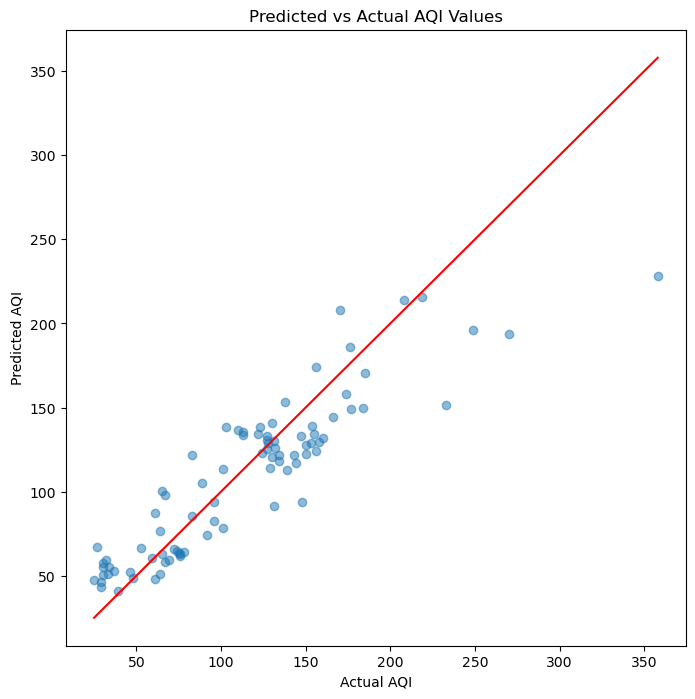

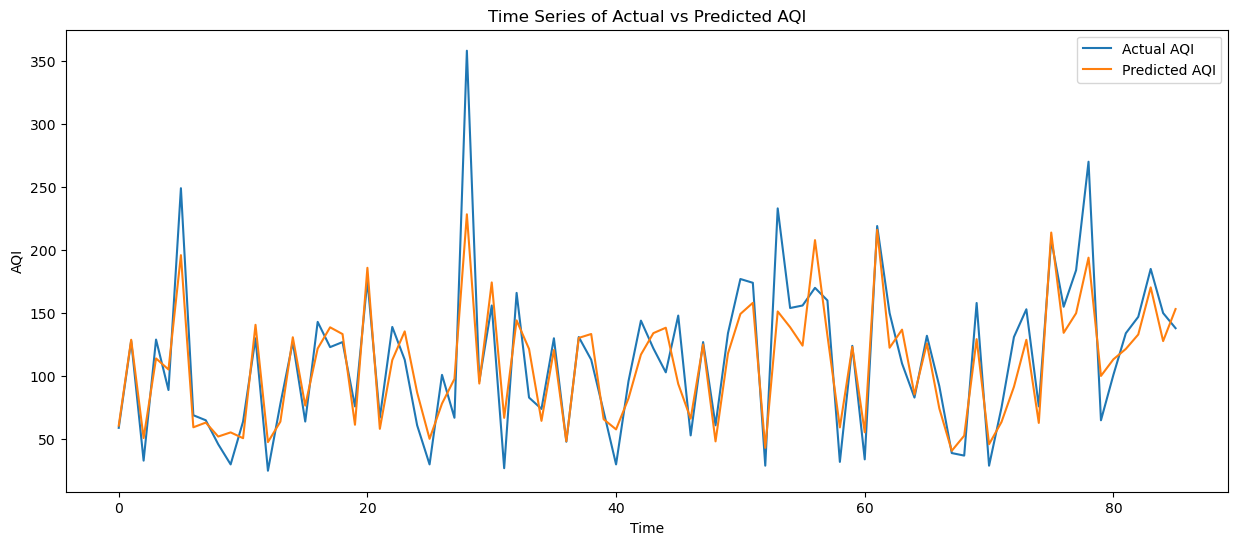

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from  preprocess_python import scaler_features,scaler_target

In [2]:
# Load the trained model
model = keras.models.load_model('/Users/shishir/Downloads/cs667-project/aqi_prediction_model.keras')


In [3]:
# Function to make a daily AQI prediction
def predict_next_day_aqi(new_data, historical_data, lookback=30):
    # Step 1: Append the new data to the historical dataset for feature columns only
    features = ['PM2.5 (µg/m³)', 'PM10 (µg/m³)','NH3 (µg/m³)','Benzene (µg/m³)','AT (°C)','RH (%)' ]
    data = pd.concat([historical_data, new_data])
    
    data=data[features]
    # Step 2: Normalize the updated feature data
    scaled_features = scaler_features.transform(data)
    scaled_features = pd.DataFrame(scaled_features, columns=features, index=data.index)
    # Step 3: Prepare the input sequence using the last 30 days of feature data
    input_sequence = scaled_features[-lookback:].values.reshape((1, lookback, len(features)))
    # Step 4: Predict the AQI for the next day (scaled AQI value)
    predicted_aqi_scaled = model.predict(input_sequence)
    # Step 5: Inverse transform the prediction to get AQI on the original scale
    # Use the target scaler for inverse transformation on the AQI prediction only
    predicted_aqi = scaler_target.inverse_transform(predicted_aqi_scaled.reshape(-1, 1)).flatten()
    
    return predicted_aqi


In [4]:
new_data = pd.DataFrame({
    'PM2.5 (µg/m³)': [19],
    'PM10 (µg/m³)': [36],
    'NH3 (µg/m³)': [2],
    'Benzene (µg/m³)': [1],
    'AT (°C)': [25],
    'RH (%)': [50],
    'AQI': [53]  # The AQI is unknown as it is what we want to predict
}, index=[pd.to_datetime('2024-11-12')])

# Make prediction for the next day AQI
historical_data=pd.read_csv('/Users/shishir/Downloads/cs667-project/filtered_data.csv')
predicted_aqi = predict_next_day_aqi(new_data, historical_data,)

print(f"Predicted AQI for the next day: {predicted_aqi}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Predicted AQI for the next day: [158.21889]
